#### Michael Perrine
#### DSC 550 Data Mining
#### Professor Werner
#### Week 7 Assignment

<h1><center>Dimensionality Reduction and Feature Selection</center></h1>

### Part 1 PCA and Variance Threshold in a Linear Regression

In [178]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
import scipy.stats as stats
from sklearn. feature_selection import chi2, SelectKBest
import seaborn as sns

In [ ]:
# This code will suppress minor warnings
warnings.filterwarnings("ignore")

1. Import the housing data and ensure that the data is loaded properly

In [3]:
# This code imports the data and validates it is loaded properly
housing = pd.read_csv(r"housing.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [4]:
# This code drops the Id column
housing = housing.drop(columns=["Id"])

In [5]:
# This code removes columns with greater than 40% of their data missing
new_housing = housing.drop(housing.columns[housing.isnull().mean() >0.40], axis = 1)
new_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


3. For numerical columns, fill in any missing data with the median value.

In [6]:
# This code displays the dimension of the data frame
new_housing.shape

(1460, 74)

In [7]:
# This code displays columns that are missing values
new_housing.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [8]:
# This code creates a for loop that fills null columns with the median value
for column in new_housing.select_dtypes(include='number').columns:
    median_value = new_housing[column].median()
    new_housing[column].fillna(median_value, inplace= True)

In [9]:
# This code displays missing values and confirms that the missing values have been replaced
new_housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

4. For categorical columns, fill in any missing data with the most common value (mode).

In [10]:
# This code shows no missing data in the columns
new_housing.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

5. Convert the categorical columns to dummy variables.

In [11]:
# This code creates a new data frame that isolates the categorical columns
# and displays the first 5 columns
new_housing_1 = new_housing.select_dtypes(include=["object"])
new_housing_1.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [12]:
# This code shows the unique labels in each column
for column in new_housing_1.columns:
    print(column, ':', len(new_housing_1[column].unique()), "labels" )

MSZoning : 5 labels
Street : 2 labels
LotShape : 4 labels
LandContour : 4 labels
Utilities : 2 labels
LotConfig : 5 labels
LandSlope : 3 labels
Neighborhood : 25 labels
Condition1 : 9 labels
Condition2 : 8 labels
BldgType : 5 labels
HouseStyle : 8 labels
RoofStyle : 6 labels
RoofMatl : 8 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
ExterQual : 4 labels
ExterCond : 5 labels
Foundation : 6 labels
BsmtQual : 5 labels
BsmtCond : 5 labels
BsmtExposure : 5 labels
BsmtFinType1 : 7 labels
BsmtFinType2 : 7 labels
Heating : 6 labels
HeatingQC : 5 labels
CentralAir : 2 labels
Electrical : 6 labels
KitchenQual : 4 labels
Functional : 7 labels
GarageType : 7 labels
GarageFinish : 4 labels
GarageQual : 6 labels
GarageCond : 6 labels
PavedDrive : 3 labels
SaleType : 9 labels
SaleCondition : 6 labels


In [13]:
# This code creates a data frame with dummy variables and displays the first 5 rows
df = pd.get_dummies(new_housing_1, drop_first= True)
df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [14]:
# This code drops the original categorical variables in the housing data frame
new_housing.drop(['MSZoning','Street','LotShape','LandContour','Utilities',
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
                'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'Heating', 'GarageCond', 'PavedDrive',
                'SaleType', 'SaleCondition'], axis = 1, inplace = True)

In [15]:
# This code located the remaining categorical columns
new_housing_2 = new_housing.select_dtypes(include=["object"])
new_housing_2.head()


,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual
0,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA
1,Gd,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA
2,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA
3,TA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA
4,Gd,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA


In [16]:
# This code created a secondary data frame with dummy variables and displays the first 5 rows
df1 = pd.get_dummies(new_housing_2, drop_first= True)
df1.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,True,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [17]:
# This code drops the remaining categorical columns from the new_housing dataframe
new_housing.drop(['BsmtQual', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                'Functional', 'GarageType', 'GarageFinish', 'GarageQual'], axis = 1, inplace = True)

In [18]:
# This code merges all three data frames into one 
new_housing = pd.concat([new_housing, df, df1], axis = 1).replace({True : 1, False : 0})
new_housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


In [19]:
# This code shows the dimension of the new_housing data frame
new_housing.shape

(1460, 262)

6. Split the data into a training and test set, where the SalePrice column is the target.

In [20]:
# This series of code splits the data between a training and testing set
X = new_housing.drop(columns=["SalePrice"], axis = 1) 
y = new_housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 19, test_size = 0.20)

In [21]:
# This code displays the first 5 rows in the X data frame
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
# This code displays the first 5 rows in the y data frame
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

7. Run a linear regression and report the R2-value and RMSE on the test set.

In [23]:
# This code runs a linear regression
lr = LinearRegression()

In [24]:
# This code fits the training data into the linear regression
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# This code creates the predict value
y_pred = lr.predict(X_test)

In [26]:
# This code calculates the rmse for the regression
root_mean_squared_error(y_test, y_pred)

57991.347929554184

In [27]:
# This code calculates the R-squared for the regression
r2_score(y_test, y_pred)

0.13156622022341757

8. Fit and transform the training features with a PCA so that 90% of the variance is retained

In [28]:
# This code splits the data
X = new_housing.drop(columns=["SalePrice"], axis = 1) 
y = new_housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 19, test_size = 0.20)

In [29]:
# This code creates the scaler 
scaleStandard = StandardScaler()

In [30]:
# This code applies the scaler to the data
X_train = scaleStandard.fit_transform(X_train)

In [31]:
# This code prints the columns
print(X.columns.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',

In [32]:
# This code converts the array back into a data frame and inserts the column names
X_train = pd.DataFrame(X_train, columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
                    'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 
                    'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa',
                    'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
                    'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
                    'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
                    'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 
                    'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
                    'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 
                    'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 
                    'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 
                    'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 
                    'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 
                    'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 
                    'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                    'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                    'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 
                    'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 
                    'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 
                    'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 
                    'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 
                    'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po',
                    'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 
                    'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 
                    'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 
                    'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
                    'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 
                    'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 
                    'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 
                    'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 
                    'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa',
                    'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 
                    'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 
                    'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 
                    'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 
                    'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
                    'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 
                    'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 
                    'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA'])

In [33]:
# This code displays the first 5 rows of the converted data frame
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,-0.867509,0.898971,0.080493,2.030692,-0.508216,1.002825,0.827234,0.564376,1.314169,-0.291359,...,-0.101885,-0.246686,-0.077648,-0.593171,-0.646124,-0.822042,-0.180871,-0.097506,-0.029273,0.344636
1,-0.867509,-0.448159,-0.392026,-0.791257,-0.508216,-0.310254,-1.112750,-0.576525,-0.965702,-0.291359,...,-0.101885,-0.246686,-0.077648,1.685854,-0.646124,1.216483,-0.180871,-0.097506,-0.029273,0.344636
2,-0.867509,-0.044020,-0.311714,-0.791257,1.307062,-0.540043,-1.452247,0.224759,0.976171,-0.291359,...,-0.101885,-0.246686,-0.077648,-0.593171,-0.646124,1.216483,-0.180871,-0.097506,-0.029273,0.344636
3,3.109234,0.225406,0.118819,-0.791257,-1.415855,-0.211773,-0.967251,-0.576525,0.844847,-0.291359,...,-0.101885,-0.246686,-0.077648,-0.593171,-0.646124,1.216483,-0.180871,-0.097506,-0.029273,0.344636
4,2.407455,-2.064715,-0.831201,-0.085770,-0.508216,0.214977,-0.336757,-0.576525,-0.296165,-0.291359,...,-0.101885,-0.246686,-0.077648,-0.593171,-0.646124,1.216483,-0.180871,-0.097506,-0.029273,0.344636


In [34]:
# This code displays the summary statistic
X_train.describe().round(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
count,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,...,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,...,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.868,-2.199,-0.913,-3.613,-4.139,-3.265,-1.695,-0.577,-0.966,-0.291,...,-0.102,-0.247,-0.078,-0.593,-0.646,-0.822,-0.181,-0.098,-0.029,-2.902
25%,-0.868,-0.448,-0.294,-0.791,-0.508,-0.573,-0.870,-0.577,-0.966,-0.291,...,-0.102,-0.247,-0.078,-0.593,-0.646,-0.822,-0.181,-0.098,-0.029,0.345
50%,-0.166,-0.044,-0.094,-0.086,-0.508,0.051,0.439,-0.577,-0.139,-0.291,...,-0.102,-0.247,-0.078,-0.593,-0.646,-0.822,-0.181,-0.098,-0.029,0.345
75%,0.302,0.405,0.117,0.620,0.399,0.970,0.924,0.357,0.593,-0.291,...,-0.102,-0.247,-0.078,1.686,1.548,1.216,-0.181,-0.098,-0.029,0.345
max,3.109,10.913,20.819,2.736,3.122,1.265,1.215,7.914,11.185,9.062,...,9.815,4.054,12.879,1.686,1.548,1.216,5.529,10.256,34.161,0.345


In [35]:
# This code creates the PCA 
pca= PCA(0.90)

In [36]:
# This code applies the PCA
X_pca = pca.fit_transform(X_train)

In [37]:
# This code displays the variance ratio of the data set
pca.explained_variance_ratio_

array([0.07830501, 0.03367515, 0.02479368, 0.02176705, 0.01893059,
       0.01707481, 0.01615689, 0.01598611, 0.01521007, 0.01451034,
       0.01347672, 0.01281939, 0.01266917, 0.01207438, 0.01165354,
       0.01127011, 0.01098479, 0.01078786, 0.01073071, 0.0102527 ,
       0.01012982, 0.0097729 , 0.00969648, 0.00959879, 0.00946049,
       0.00910841, 0.00906691, 0.00899979, 0.0087291 , 0.00870084,
       0.0084809 , 0.00827571, 0.00807749, 0.00782078, 0.00766633,
       0.00750182, 0.00743695, 0.00729118, 0.00718345, 0.00711608,
       0.00708266, 0.00688956, 0.00678319, 0.00666637, 0.00661102,
       0.00647313, 0.00633921, 0.00612133, 0.00610758, 0.00602195,
       0.00599734, 0.00592756, 0.00586915, 0.00584021, 0.00579251,
       0.00565895, 0.00556256, 0.0054717 , 0.00541616, 0.00529668,
       0.00520198, 0.00511343, 0.00508756, 0.00503991, 0.0049863 ,
       0.00486701, 0.00482723, 0.00482042, 0.00478485, 0.00473699,
       0.00468133, 0.00463182, 0.00458364, 0.00451244, 0.00447

9. How many features are in the PCA-transformed matrix?

In [38]:
# This code gives the shape of the matrix
X_pca.shape

(1168, 122)

10. Transform but DO NOT fit the test features with the same PCA.

In [39]:
# This code creates the standard scaler
scaleStandard = StandardScaler()

In [40]:
# This code applies the scaler to the data
X_test = scaleStandard.fit_transform(X_test)

In [41]:
# This code converts the array back into a data frame
X_test = pd.DataFrame(X_test, columns= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA'])

In [42]:
# This code displays the first 5 rows 
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,-0.152256,-0.447781,-0.247072,-0.822103,0.315114,-1.050183,-1.668214,-0.565141,-0.266875,-0.280214,...,-0.156721,-0.278372,-0.083045,1.586843,-0.603727,1.085866,-0.197853,-0.101885,-0.083045,0.305995
1,-0.895298,0.886423,-0.263231,-0.822103,0.315114,0.153593,-0.461280,-0.565141,-1.010814,-0.280214,...,-0.156721,-0.278372,-0.083045,1.586843,-0.603727,1.085866,-0.197853,-0.101885,-0.083045,0.305995
2,-0.152256,0.409922,0.641023,-0.008360,-0.552935,-0.775034,-1.668214,-0.565141,-1.010814,-0.280214,...,-0.156721,-0.278372,-0.083045,-0.630182,-0.603727,1.085866,-0.197853,-0.101885,-0.083045,0.305995
3,-0.895298,0.648173,-0.032248,-0.008360,-0.552935,1.322976,1.180150,-0.565141,-0.924975,-0.280214,...,-0.156721,-0.278372,-0.083045,-0.630182,1.656379,-0.920924,-0.197853,-0.101885,-0.083045,0.305995
4,-0.895298,2.315928,0.279911,0.805383,-0.552935,1.047827,0.842208,0.481328,-1.010814,-0.280214,...,-0.156721,-0.278372,-0.083045,-0.630182,1.656379,-0.920924,-0.197853,-0.101885,-0.083045,0.305995


In [43]:
# This code displays the summary statistic
X_test.describe().round(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
count,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,...,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000,292.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-0.895,-2.306,-0.899,-2.450,-3.157,-2.770,-1.668,-0.565,-1.011,-0.280,...,-0.157,-0.278,-0.083,-0.630,-0.604,-0.921,-0.198,-0.102,-0.083,-3.268
25%,-0.895,-0.448,-0.310,-0.822,-0.553,-0.680,-0.896,-0.565,-1.011,-0.280,...,-0.157,-0.278,-0.083,-0.630,-0.604,-0.921,-0.198,-0.102,-0.083,0.306
50%,-0.152,-0.019,-0.142,-0.008,-0.553,0.016,0.456,-0.565,-0.113,-0.280,...,-0.157,-0.278,-0.083,-0.630,-0.604,-0.921,-0.198,-0.102,-0.083,0.306
75%,0.343,0.422,0.067,0.805,0.315,0.979,0.890,0.345,0.600,-0.280,...,-0.157,-0.278,-0.083,1.587,1.656,1.086,-0.198,-0.102,-0.083,0.306
max,3.315,4.698,14.091,3.247,2.919,1.323,1.228,4.793,4.378,6.154,...,6.381,3.592,12.042,1.587,1.656,1.086,5.054,9.815,12.042,0.306


In [44]:
# This code transforms the X_test data
X_pca_1 = pca.transform(X_test)

In [45]:
# This code displays the shape of the matrix
X_pca_1.shape

(292, 122)

11. Repeat step 7 with your PCA transformed data.

In [46]:
# This code runs a linear regression
lr = LinearRegression()

In [47]:
# This code fits the linear regression
lr.fit(X_pca, y_train)

LinearRegression()

In [48]:
# This code creates the prediction value with the transformed X_test 
y_pred = lr.predict(X_pca_1)


In [49]:
# This code produces the RMSE for the regression
root_mean_squared_error(y_test, y_pred)

36302.99577902379

In [50]:
#This code produces the R-squared for the regression
r2_score(y_test, y_pred)

0.6596739199557674

12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [51]:
# This code splits the data
X = new_housing.drop(columns=["SalePrice"], axis = 1) 
y = new_housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 19, test_size = 0.20)

In [52]:
# This code creates the Min/Max object
scale = MinMaxScaler()

In [53]:
# This code fits and transforms the training set to the Min/Max scaler
X_train = scale.fit_transform(X_train)

In [54]:
# This code prints the columns
print(X.columns.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',

In [55]:
# This code turns the Min/Max array into a data frame
X_train = pd.DataFrame(X_train, columns = ['MSSubClass', 'LotFrontage', 'LotArea',
                        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                        'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 
                        'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2',
                        'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 
                        'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 
                        'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 
                        'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
                        'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
                        'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
                        'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 
                        'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 
                        'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
                        'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
                        'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                        'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 
                        'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 
                        'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 
                        'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 
                        'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 
                        'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
                        'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 
                        'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
                        'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 
                        'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 
                        'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
                        'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
                        'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                        'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 
                        'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 
                        'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 
                        'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 
                        'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 
                        'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc',
                        'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 
                        'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 
                        'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd',
                        'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
                        'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 
                        'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd',
                        'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 
                        'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
                        'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 
                        'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 
                        'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa',
                        'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
                        'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 
                        'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 
                        'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 
                        'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
                        'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 
                        'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 
                        'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 
                        'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 
                        'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
                        'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtQual_Fa',
                        'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 
                        'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 
                        'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 
                        'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 
                        'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd', 
                        'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
                        'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd',
                        'GarageQual_Po', 'GarageQual_TA'])

In [56]:
# This code validates the array was converted by showing the first five rows of the dataframe
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,0.000000,0.236301,0.045708,0.888889,0.500,0.942029,0.866667,0.134375,0.187633,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.133562,0.023965,0.444444,0.500,0.652174,0.200000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000000,0.164384,0.027661,0.444444,0.750,0.601449,0.083333,0.094375,0.159816,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.000000,0.184932,0.047472,0.444444,0.375,0.673913,0.250000,0.000000,0.149008,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.823529,0.010274,0.003756,0.555556,0.500,0.768116,0.466667,0.000000,0.055103,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


13. Find the min-max scaled features in your training set that have a variance above 0.1

In [57]:
# This codes sets the feature range above 
scale = MinMaxScaler(feature_range=(0.2,1))

In [58]:
# This code fits and transforms the training set to the feature range with a varinace
# above 0.1
X_train = scale.fit_transform(X_train)

In [59]:
# This code converts the transformed array into a data frame
X_train = pd.DataFrame(X_train, columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                                        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                                        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                                        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 
                                        'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2',
                                        'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
                                        'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 
                                        'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 
                                        'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
                                        'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 
                                        'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
                                        'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
                                        'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 
                                        'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 
                                        'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
                                        'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
                                        'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 
                                        'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 
                                        'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 
                                        'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon',
                                        'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 
                                        'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
                                        'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 
                                        'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
                                        'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                                        'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
                                        'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
                                        'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 
                                        'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 
                                        'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 
                                        'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 
                                        'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
                                        'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 
                                        'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 
                                        'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
                                        'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
                                        'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
                                        'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 
                                        'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 
                                        'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 
                                        'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa',
                                        'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
                                        'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 
                                        'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 
                                        'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 
                                        'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
                                        'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 
                                        'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
                                        'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 
                                        'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 
                                        'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 
                                        'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtQual_Fa',
                                        'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
                                        'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
                                        'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
                                        'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 
                                        'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
                                        'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd',
                                        'GarageQual_Po', 'GarageQual_TA'])

In [60]:
# This code validates the array is in a data frame 
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,0.200000,0.389041,0.236567,0.911111,0.6,0.953623,0.893333,0.3075,0.350106,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.0
1,0.200000,0.306849,0.219172,0.555556,0.6,0.721739,0.360000,0.2000,0.200000,0.2,...,0.2,0.2,0.2,1.0,0.2,1.0,0.2,0.2,0.2,1.0
2,0.200000,0.331507,0.222129,0.555556,0.8,0.681159,0.266667,0.2755,0.327853,0.2,...,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,1.0
3,1.000000,0.347945,0.237978,0.555556,0.5,0.739130,0.400000,0.2000,0.319206,0.2,...,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,1.0
4,0.858824,0.208219,0.203005,0.644444,0.6,0.814493,0.573333,0.2000,0.244082,0.2,...,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,1.0


14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [61]:
# This code transforms the testing set
X_test = scale.transform(X_test)

In [62]:
# Thi code converts the test data array back into a data frame
X_test = pd.DataFrame(X_test, columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                                        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                                        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                                        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV',
                                        'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 
                                        'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 
                                        'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 
                                        'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
                                        'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 
                                        'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 
                                        'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
                                        'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
                                        'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 
                                        'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 
                                        'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 
                                        'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 
                                        'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 
                                        'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 
                                        'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 
                                        'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 
                                        'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 
                                        'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
                                        'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 
                                        'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 
                                        'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 
                                        'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
                                        'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
                                        'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
                                        'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 
                                        'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 
                                        'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 
                                        'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 
                                        'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
                                        'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 
                                        'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 
                                        'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 
                                        'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
                                        'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 
                                        'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 
                                        'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 
                                        'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 
                                        'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 
                                        'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 
                                        'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 
                                        'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 
                                        'Functional_Typ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
                                        'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 
                                        'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
                                        'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 
                                        'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
                                        'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
                                        'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'BsmtQual_Fa', 
                                        'BsmtQual_Gd', 'BsmtQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 
                                        'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 
                                        'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1',
                                        'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_Attchd',
                                        'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 
                                        'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
                                        'GarageQual_TA'])

In [63]:
# This code validates the test data is back in a data frame
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,40.2,48.2,6528.2,4.2,5.0,1552.2,1560.2,0.2,249.8,0.2,...,0.2,0.2,0.2,1.0,0.2,1.0,0.2,0.2,0.2,1.0
1,16.2,70.6,6392.2,4.2,5.0,1580.2,1580.2,0.2,0.2,0.2,...,0.2,0.2,0.2,1.0,0.2,1.0,0.2,0.2,0.2,1.0
2,40.2,62.6,14002.6,5.0,4.2,1558.6,1560.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,1.0
3,16.2,66.6,8336.2,5.0,4.2,1607.4,1607.4,0.2,29.0,0.2,...,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,1.0
4,16.2,94.6,10963.4,5.8,4.2,1601.0,1601.8,120.2,0.2,0.2,...,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,1.0


15. Repeat step 7 with the high variance data.

In [64]:
# This code creates the linear regression object
lr = LinearRegression()

In [65]:
# This code fits the data to the linear regression 
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
# This code creates the prediction object
y_pred = lr.predict(X_test)

In [67]:
# This code calculates the RMSE for the regression
root_mean_squared_error(y_test, y_pred)

3085841895.960715

In [75]:
# This code calculates the R-squared for the regression
r2_score(y_test, y_pred)

-2458994985.6065016

16. Summarize your findings.

During the analysis of the housing data I ran three linear regressions. In the first regression I cleaned the data and removed the ID column. I also created dummy variables for several columns whose data type is object. My first regression yielded an RMSE of 57991.34 and an R-squared of
0.13. 

I want to improve my result so in the second regression I ran my data through a PCA analysis to determine the features that will produce the best result. After the PCA analysis I ran another regression. The result of the second regression yielded an RMSE of 36302.99 and an R-squared of 0.65. After the PCA we see an improved RMSE and R-squared. This is due to the improved features in the analysis. The PCA removes the features that don't benefit the analysis. 

Finally I want to run one more analysis using Min/Max to filter the features. In this final regression the results were less than impressive. I received an RMSE score of  3085841895.960715 and an R-squared of -2458994985.6065016. I'm sure I did something wrong but not quite sure what it is.

### Part 2 Categorical Feature Selection

1. Import the data as a data frame and ensure it is loaded correctly.

In [ ]:
# This series of code loads the data frame and displays the first five rows
df = pd.read_csv(r"mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# This code displays all the features in the data set
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

2. Convert the categorical features (all of them) to dummy variables.

In [ ]:
# This code creates dummy variables and displays the first five rows
df_1 = pd.get_dummies(df, drop_first= True).replace({True : 1, False : 0})
df_1.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# This code displays the dimensions of the data set
df_1.shape

(8124, 96)

3. Split the data into a training and test set.

In [ ]:
# This code splits the data into a training and testing set
X_1 = df_1.drop(columns=["class_p"], axis = 1)
y_1 = df_1['class_p']
X_train, X_test, y_train, y_test= train_test_split(X_1, y_1, test_size=0.20, random_state= 10)

In [ ]:
# This code displays the shape of the X training set
X_train.shape

(6499, 95)

In [ ]:
# This code displays the shape of the X testing set
X_test.shape

(1625, 95)

In [ ]:
# This code displays the shape of the y training set
y_train.shape

(6499,)

In [ ]:
# This code displays the shape of the y testing set
y_test.shape

(1625,)

4. Fit a decision tree classifier on the training set.

In [ ]:
# This code creates the decision tree object
dtc = DecisionTreeClassifier(random_state=10 )

In [ ]:
# This code fits the data to the decision tree object
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
# This code creates the prediction object
y_pred_1 = dtc.predict(X_test)

5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [ ]:
# This code calculates the R- squared for the decision tree
r2_score(y_test, y_pred_1)

1.0

In [ ]:
# This code calculates the accuracy score for the decision tree
accuracy_score(y_test, y_pred_1)

1.0

In [ ]:
# This code creates the confusion matrix
print(confusion_matrix(y_test, y_pred_1))

[[861   0]
 [  0 764]]


6. Create a visualization of the decision tree.

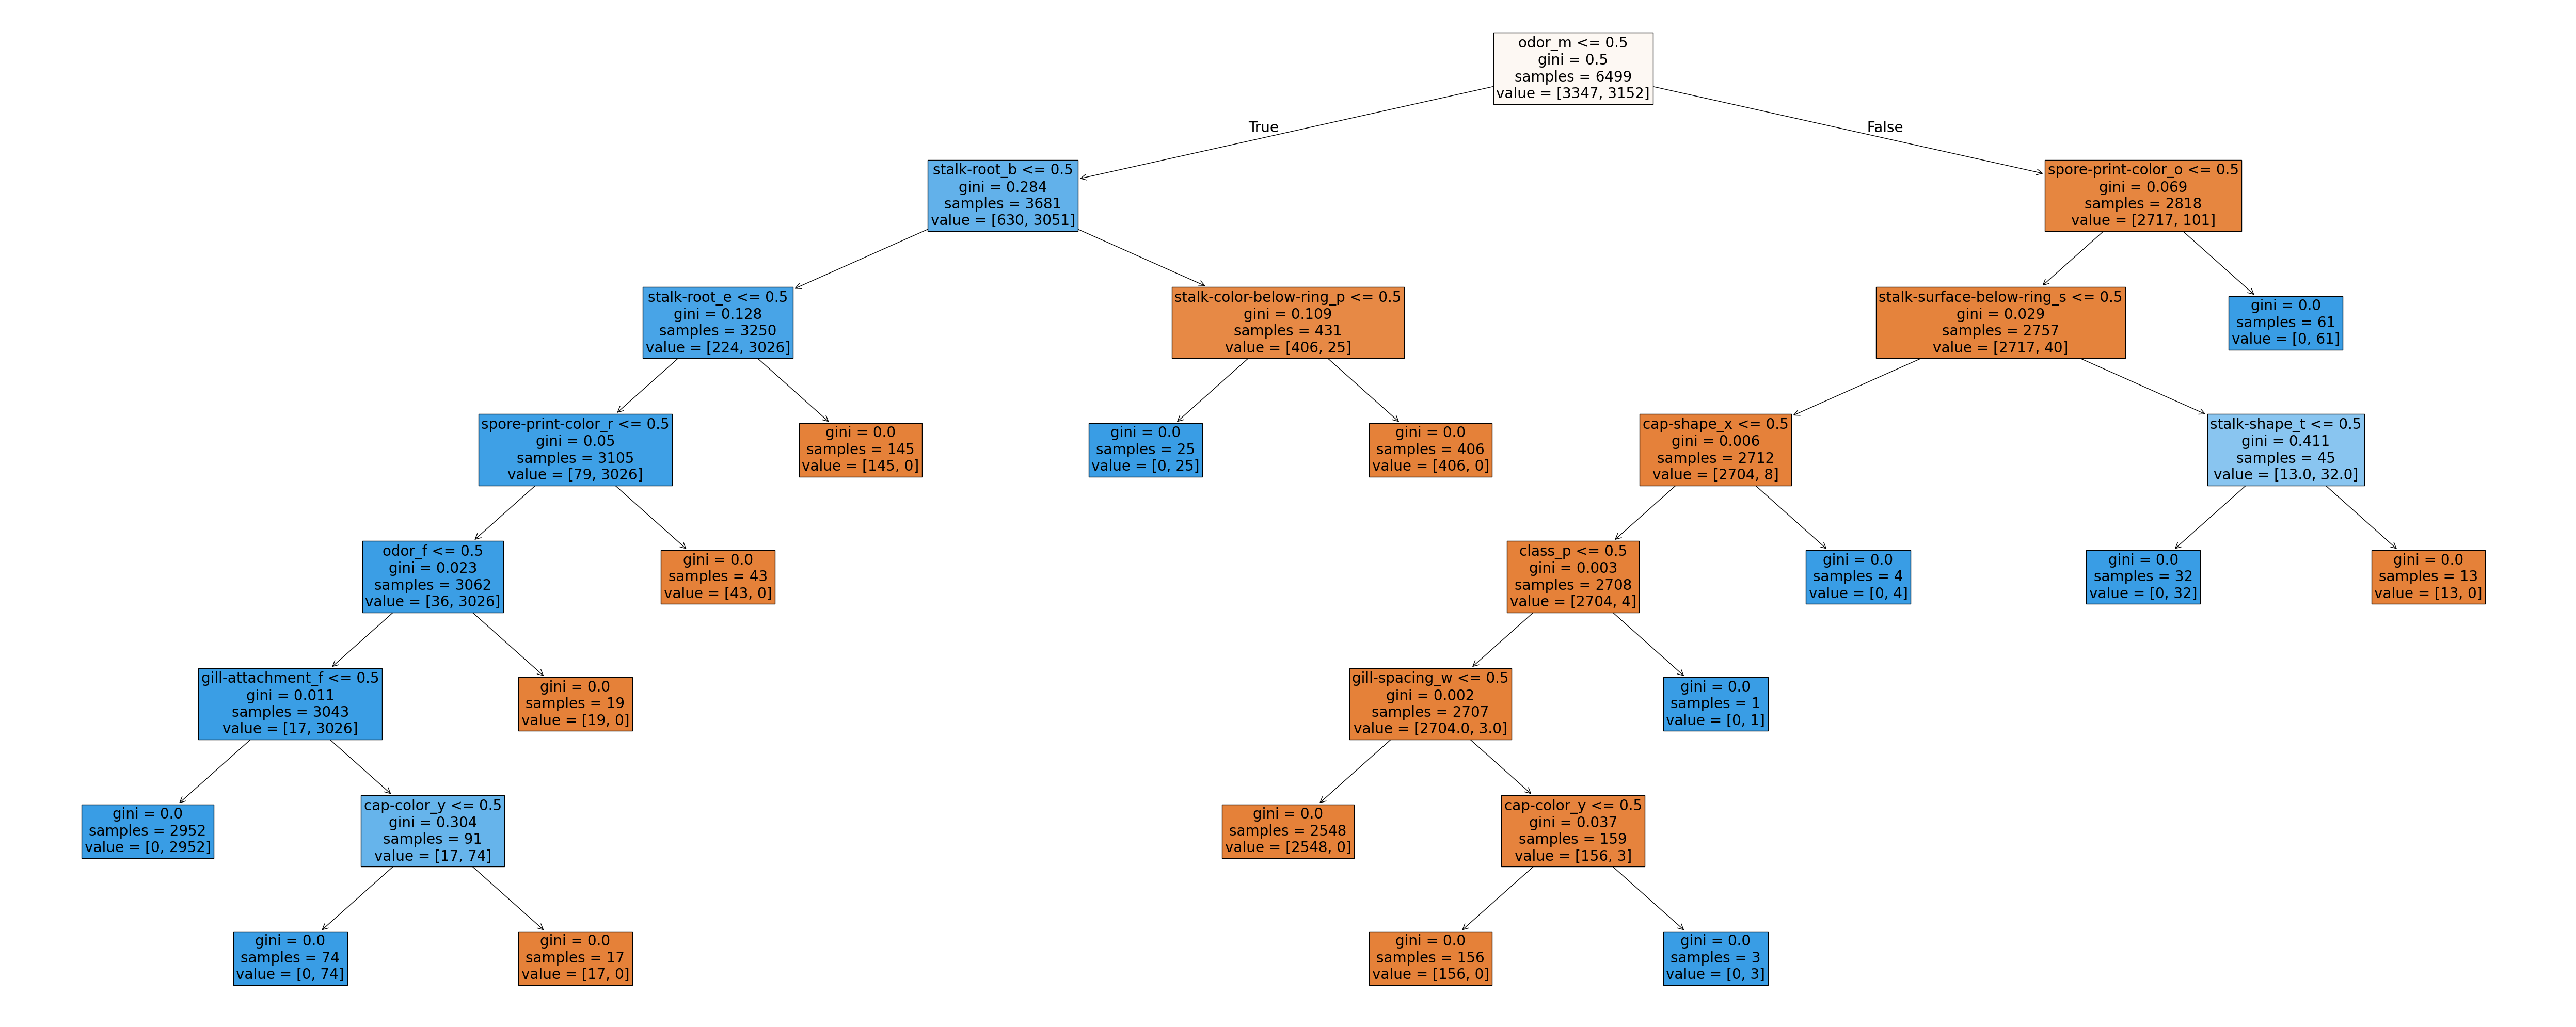

In [ ]:
# This code creates the decision tree visual for the analysis
plt.figure("Decision Tree", figsize=(50,20))
plot_tree(dtc,fontsize= 20, filled= True, feature_names= df_1.columns)
plt.tight_layout()
plt.show()

7. Use a χ2-statistic selector to pick the five best features for this data 

In [ ]:
# This code creates the object to determine the five best features
sel = SelectKBest(chi2, k = 5).fit(X_1, y_1)

In [ ]:
# This code creates an array of the  five best features
sel_bool = sel.get_support()

In [ ]:
# This code creates the data frame of the five best features
X_1_sel = X_1[X_1.columns[sel_bool]]
X_1_sel.head()

,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


<Axes: >

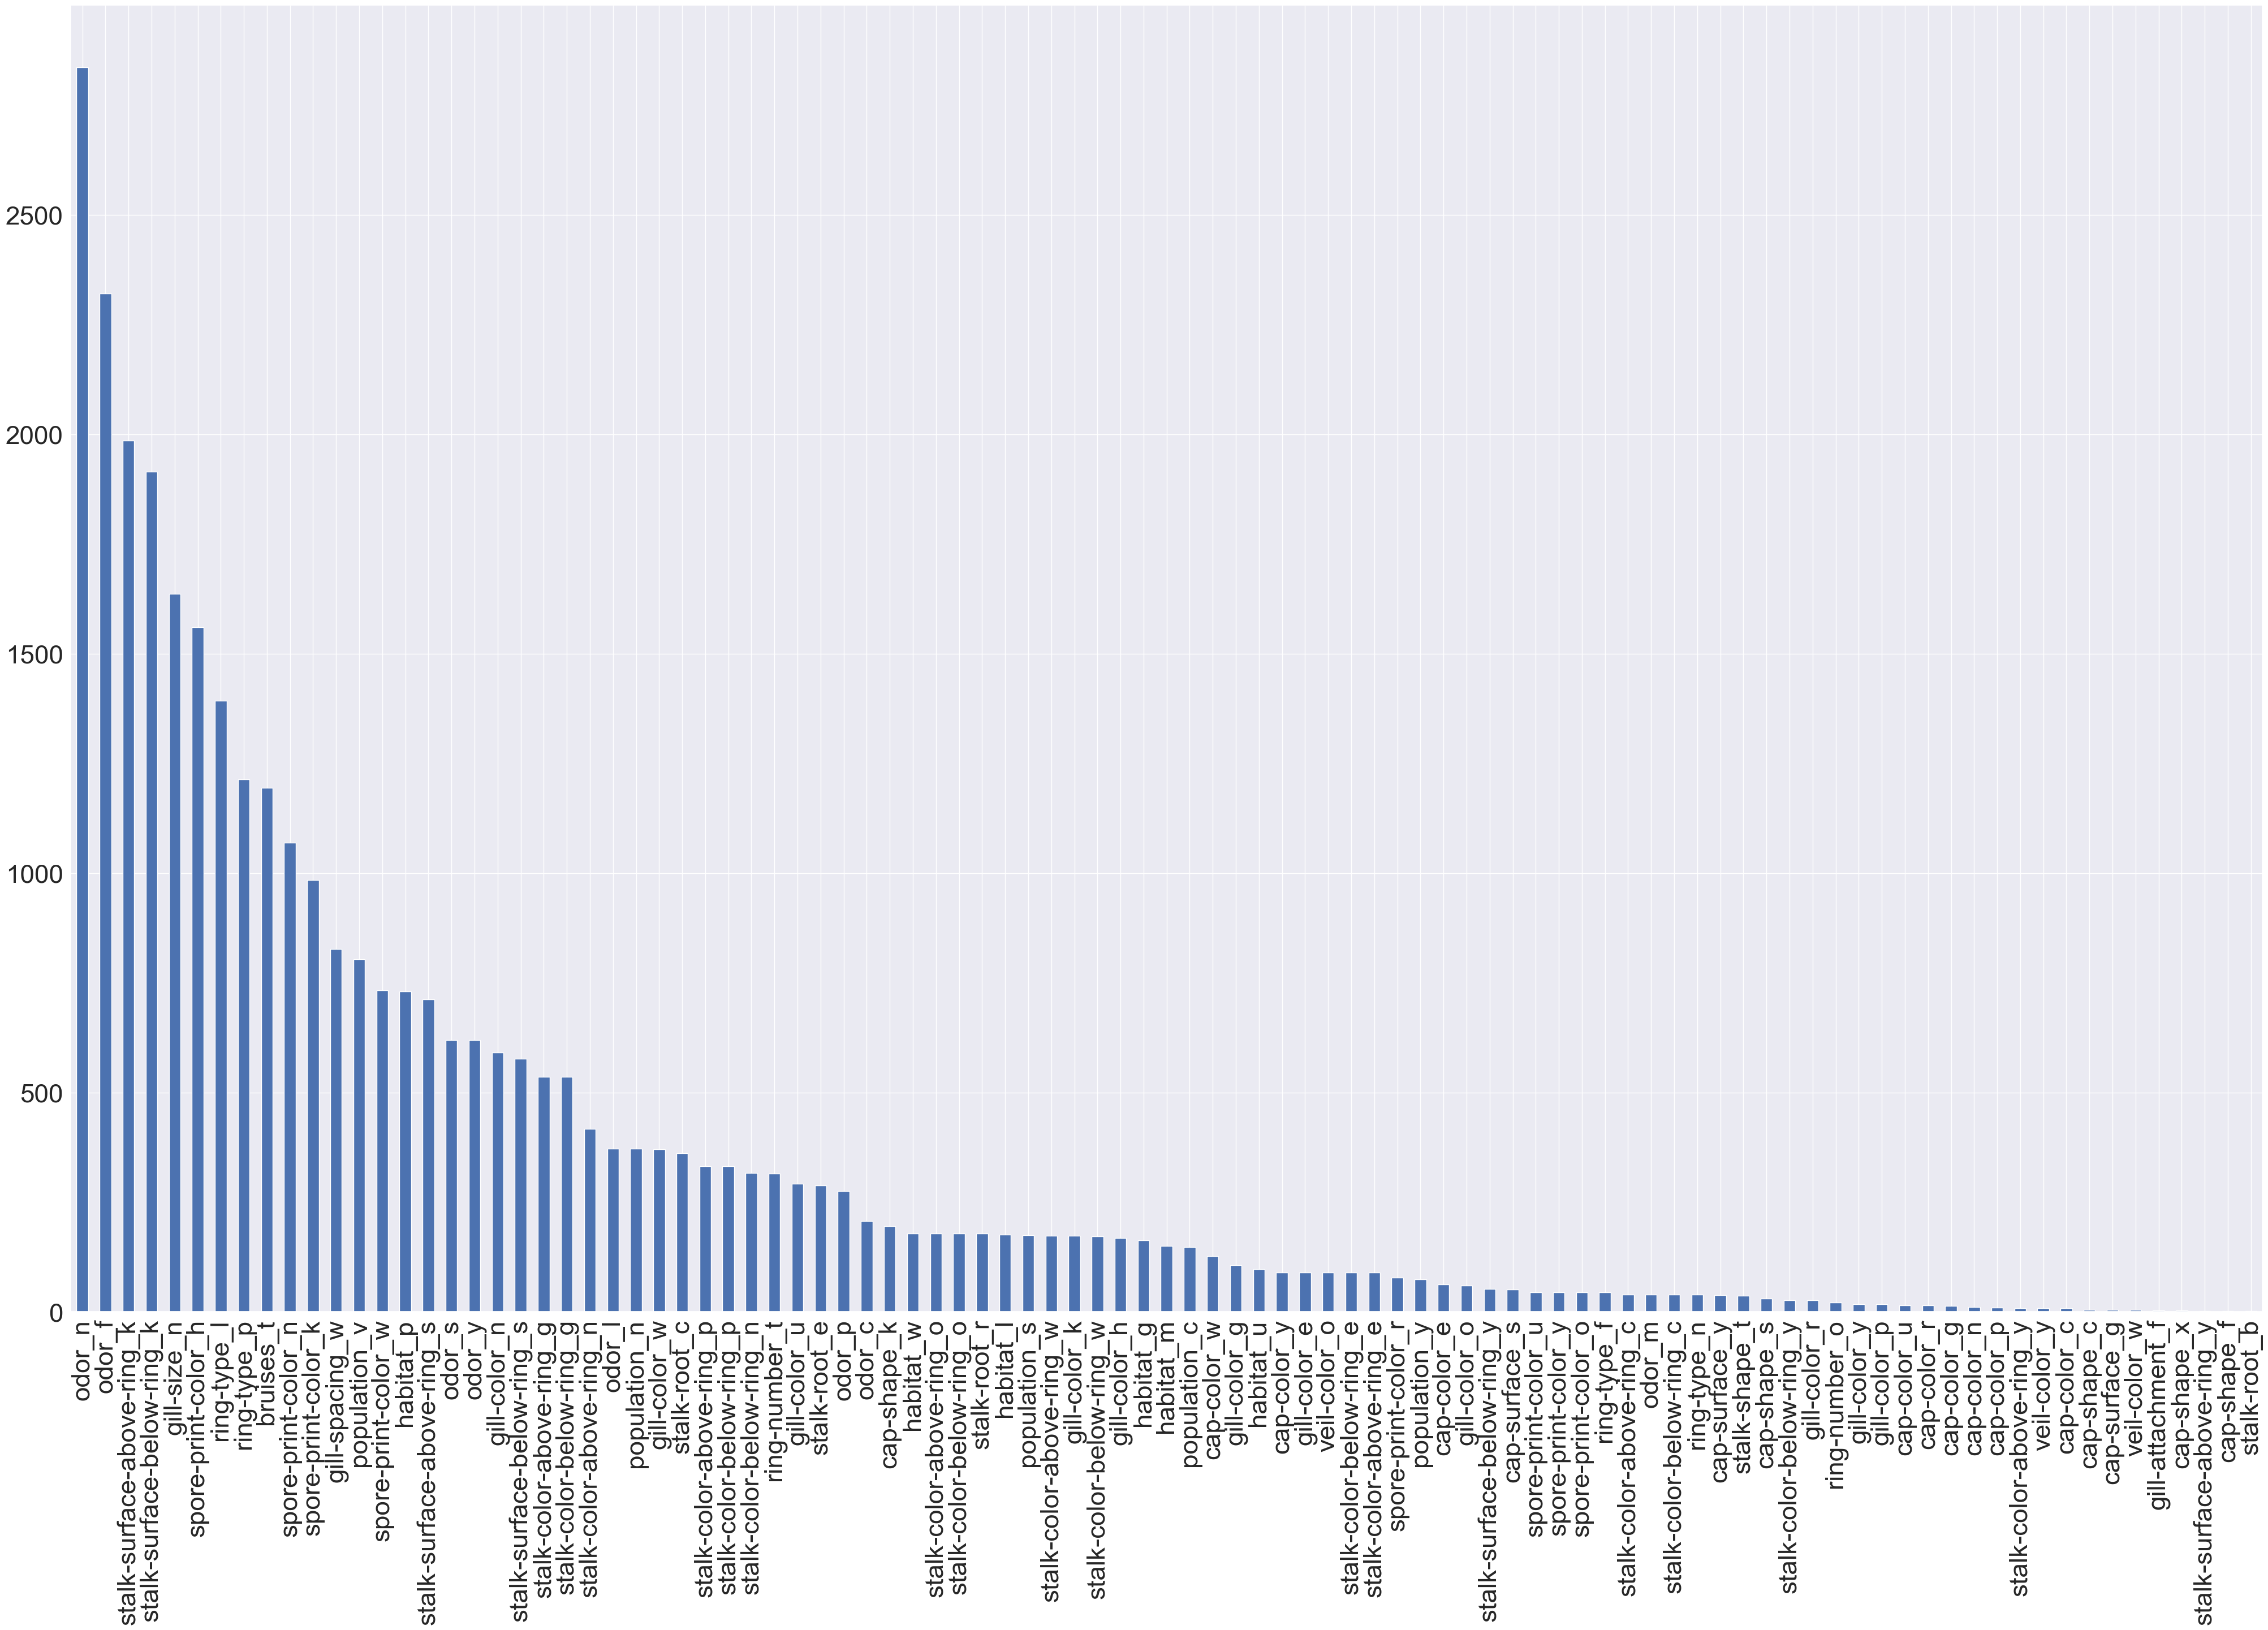

In [ ]:
# This code creates a bar graph of the CHI Square values of the features
chi_values = pd.Series(chi_sq[0], index= X_1.columns)
chi_values.sort_values(ascending= False, inplace = True)
plt.figure(figsize=(50,30))
sns.set_theme(font_scale= 3)
chi_values.plot.bar()

8. Which five features were selected in step 7? Hint: Use the get_support function.

In [ ]:
# This code displays the first five rows of the new data set
X_1_sel.head()

,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [ ]:
# This code creates the new training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1_sel, y_1, random_state=10, test_size= 0.20)

In [ ]:
# This code fits the data to the decision tree
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
# This code creates the prediction object
y_pred_2 = dtc.predict(X_test)

In [ ]:
# This code calculates the R-Squared for the decision tree
r2_score(y_test, y_pred_2)

0.9258897787182808

In [ ]:
# This code calculates the accuracy score for the decision tree
accuracy_score(y_test, y_pred_2)

0.9815384615384616

In [ ]:
# This code calculates the confusion matrix 
print(confusion_matrix(y_test, y_pred_2))

[[844  17]
 [ 13 751]]


10. Summarize your findings.

In this analysis we reviewed the mushroom dataset. The goal is to predict poisonous and edible mushrooms. To accomplish this I will use features of mushrooms and create a decision tree to predict the mushroom. In the first decision tree I used all the features to make the prediction. In this first analysis I obtained an accuracy score of 1 and a perfect confusion matrix score. In the second analysis I used CHI-Square to score my features and used the SelectKBest function to select the five best features in the data set. After I ran another analysis I received an accuracy score of 98.1 percent and mis-predicted 17 positives and 13 negatives. It was not as good of a result in the second run versus the first but still a respectable score given the use of only five of the features.